# extracting numpy files

In [1]:
# configures the jupyter note book to reload python modules that are imported 
%load_ext autoreload
%autoreload 2
#configures jupyter to format matplotlib
%matplotlib inline

In [2]:
#manages conventional images 
from PIL import Image
#manages data structures
import numpy as np

In [5]:
# rgb_path = r"C:\Users\thoma\AIML2024Summer\npFiles\cropped_band432.npy"
# cropped_band432 = np.load(rgb_path)
bands_432_img = Image.fromarray(np.uint8(cropped_band432*255))

## cloud gen

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from src import *


plt.rcParams["figure.figsize"] = (20,10)
GPU_IDX = 0

def show(tensor,*args,**kwargs):   
    while len(tensor.shape)>3:
        tensor=tensor[0]
    plt.imshow(tensor.permute(1,2,0).detach().cpu(),*args,**kwargs)

In [7]:
import imageio

rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255

# to tensor (B,C,H,W)
rgb_img = torch.FloatTensor(rgb_img).permute(2,0,1)

C:\Users\thoma\AppData\Local\Temp\ipykernel_21500\2539462654.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255


In [8]:
# b_img=rgb_img.expand(4,3,256,256)
# cl, cmask, smask = add_cloud_and_shadow(b_img,
#                                         return_cloud=True
#                                        )

# Multi-Spectral Data
While the magnitude of the clouds is quite comparable in the RGB bands (since they appear in approximately white colour), the relationship between the cloud strength and channel frequency is generally more complex.

As an example, let's open an example file containing 12 bands from Sentinel-2 L1C (except for Band 10, which often interacts with the clouds quite differently).

In [9]:
#considering using the zoom function to keep overall image but reduce resolution

from scipy.ndimage import zoom

In [10]:
#original hyperspectral image with original size
bands_path = r"C:\Users\thoma\AIML2024Summer\npFiles\bands.npy"
bands = np.load(bands_path)
bands = np.swapaxes(bands,2,0)

In [11]:
#cropped hyperspectral image with cropped size
cropped_bands_path = r"C:\Users\thoma\AIML2024Summer\npFiles\cropped_bands.npy"
cropped_bands = np.load(cropped_bands_path)
cropped_bands = np.swapaxes(cropped_bands,2,0)

In [12]:
bands.shape

(8, 7751, 7821)

In [13]:
cropped_bands.shape

(8, 512, 512)

In [14]:
# factor = 0.5  # Adjust the downsampling factor as needed
# downsized_bands = zoom(bands, (1, factor, factor))


In [15]:
clean = torch.from_numpy(cropped_bands)
cloudy = torch.from_numpy(cropped_bands)
mask = torch.from_numpy(cropped_bands)

In [16]:
clean

tensor([[[4.3718e-01, 4.3801e-01, 4.3749e-01,  ..., 4.2567e-01,
          4.2559e-01, 4.2555e-01],
         [4.3537e-01, 4.3926e-01, 4.4351e-01,  ..., 4.2524e-01,
          4.2441e-01, 4.2217e-01],
         [4.3408e-01, 4.3746e-01, 4.4131e-01,  ..., 4.2339e-01,
          4.2587e-01, 4.2540e-01],
         ...,
         [4.6228e-01, 4.8149e-01, 4.9960e-01,  ..., 5.3095e-01,
          5.4207e-01, 5.4376e-01],
         [4.6872e-01, 4.8078e-01, 4.9748e-01,  ..., 5.2235e-01,
          5.3291e-01, 5.3217e-01],
         [4.7733e-01, 4.7796e-01, 4.8978e-01,  ..., 5.1712e-01,
          5.1402e-01, 5.1429e-01]],

        [[4.1459e-01, 4.1628e-01, 4.1483e-01,  ..., 3.9802e-01,
          3.9833e-01, 3.9825e-01],
         [4.1220e-01, 4.1671e-01, 4.2272e-01,  ..., 3.9703e-01,
          3.9625e-01, 3.9413e-01],
         [4.0921e-01, 4.1393e-01, 4.1809e-01,  ..., 3.9311e-01,
          3.9711e-01, 3.9731e-01],
         ...,
         [4.4111e-01, 4.7234e-01, 4.9512e-01,  ..., 5.3845e-01,
          5.522

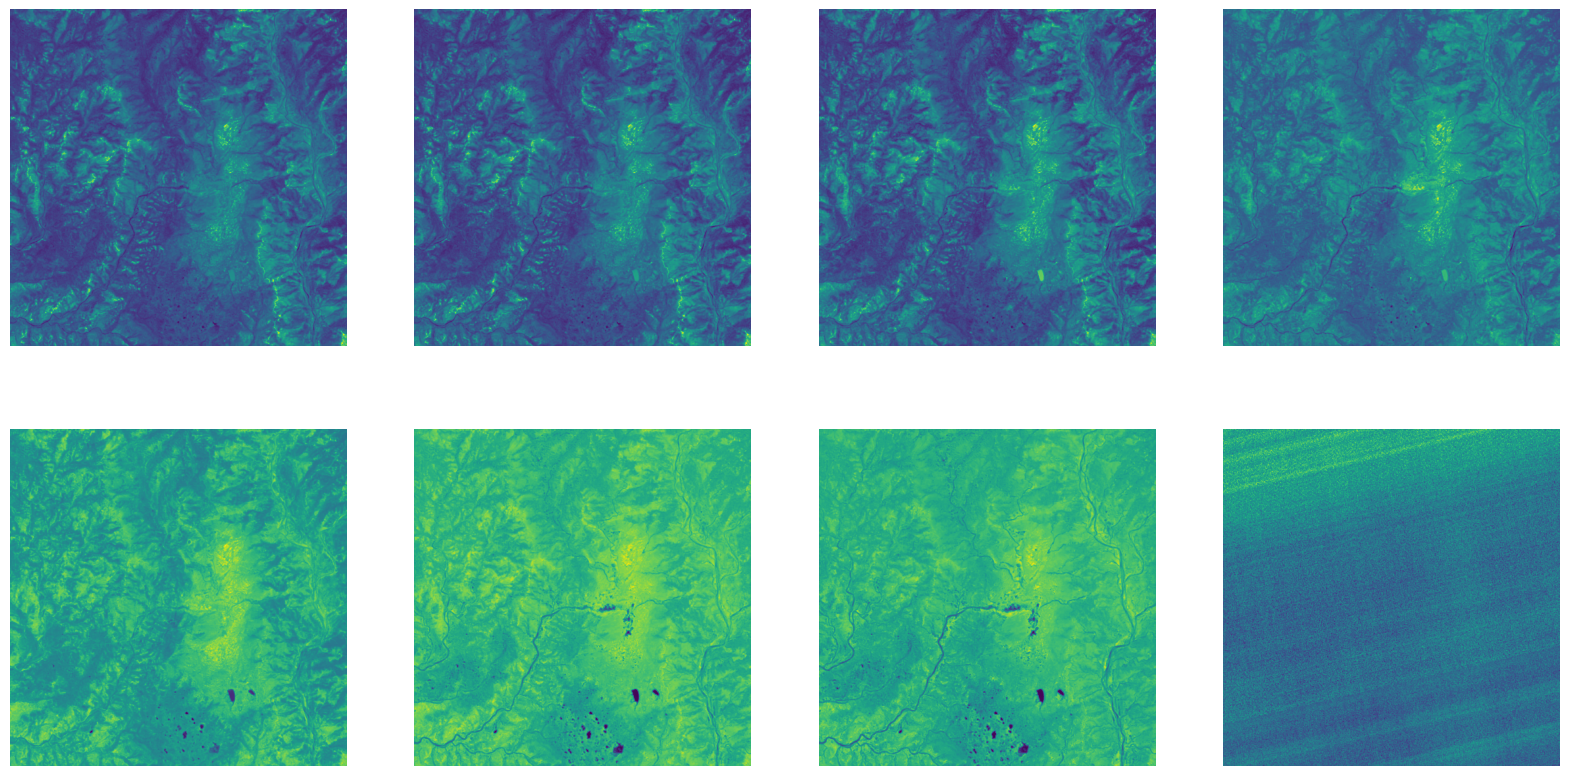

In [28]:
for i in range(0,8):
    img = clean[i]
    plt.subplot(2,4,1+i)
    plt.imshow(img)
    plt.axis('off')

In [17]:
from src.band_magnitudes import *

In [18]:
cmags=q_mag(cloudy,mask==0.0,mask_cloudy=mask==1.0,clean=clean,q=0.99,q2=0.5)

In [35]:
test1=add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              cloud_color=False,
            )

test2=add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              cloud_color=True,
            )

# test3=add_cloud_and_shadow(clean,
#               locality_degree=2,
#               min_lvl=0.0,
#               max_lvl= 0.4,
#               cloud_color=True,
#             )

for idx,img in enumerate(out[0]):
    plt.subplot(2,8,1+idx)
    plt.imshow(test1)
    # plt.imshow(test3)

    
    

KeyboardInterrupt: 

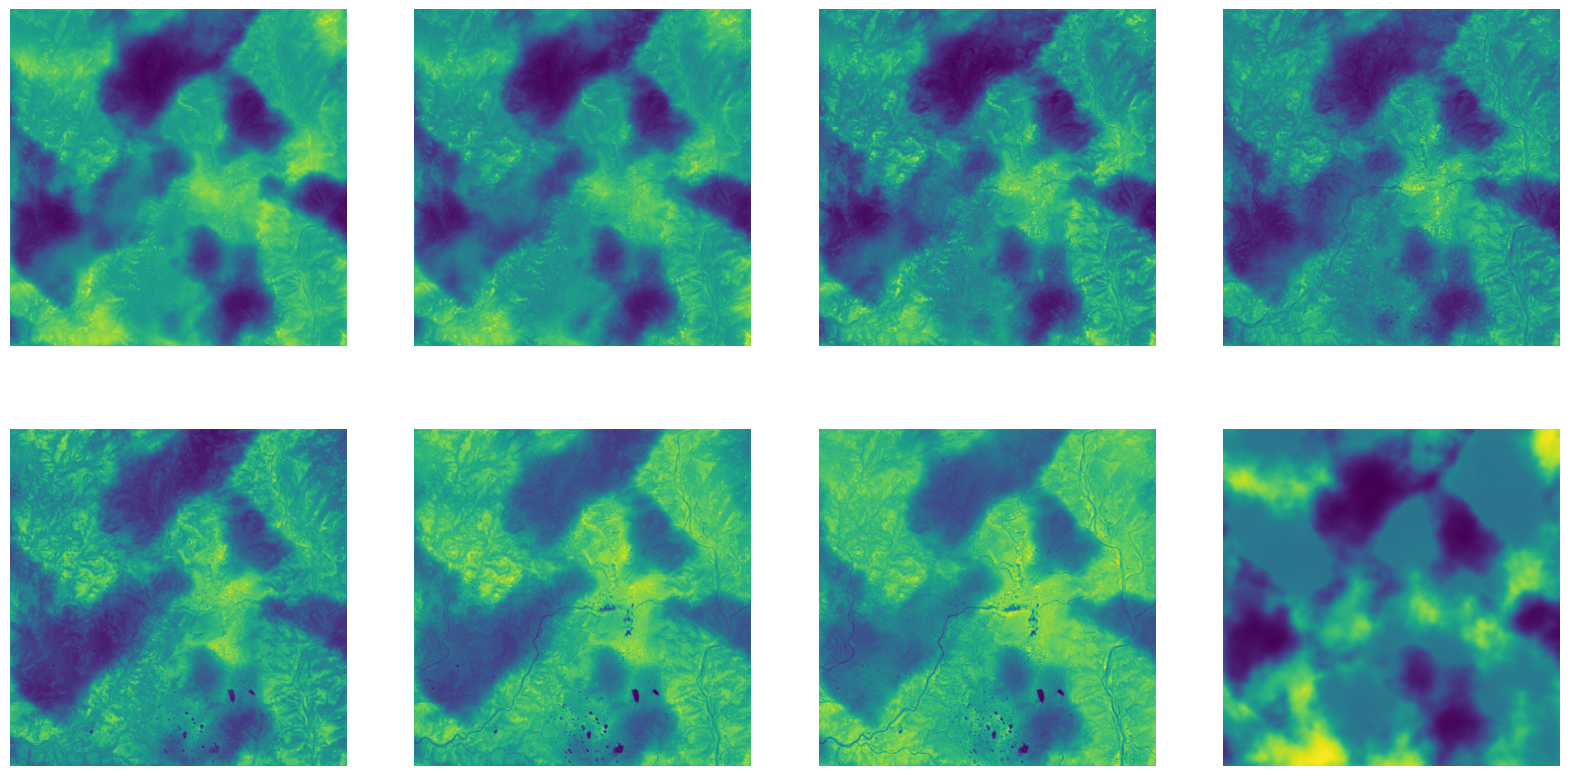

In [33]:
test1=add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              channel_offset=20
            )

test2=add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.1,
              max_lvl= 0.4,
              channel_offset=40
            )

test3=add_cloud_and_shadow(clean,
              locality_degree=2,
              min_lvl=0.0,
              max_lvl= 0.4,
              channel_offset=60
            )

for idx,img in enumerate(out[0]):
    plt.subplot(2,4,1+idx)
    plt.imshow(test1)
    plt.imshow(test2)
    plt.imshow(test3)

    plt.axis('off')
    plt.savefig("cloud_gen.png")

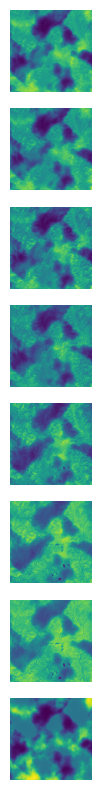

In [34]:
cl =add_cloud_and_shadow(clean,
              locality_degree=2,
              noise_type = 'perlin',
              min_lvl=0.0,
              max_lvl= 0.2,
              cloud_color=False,
              channel_offset = 14,
              shadow_max_lvl = 0.7
            )
  

for idx,img in enumerate(out[0]):
    plt.subplot(8,1,1+idx)
    plt.imshow(img)
    plt.axis('off')
    plt.savefig("cloud_gen.png")